Data Set Iris- import

In [27]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [28]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

$\mathbf{x^T} = \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix} 
= \begin{pmatrix} \text{sepal length} \\ \text{sepal width} \\\text{petal length} \\ \text{petal width} \end{pmatrix}$

$X$ is a $M\times d$ matrix where $M$ denotes the number of data and $d$ denotes the dimension of the data. In this case $M=150$ and $d=2.$ We want to show that the last two columns petal_len and petal_wid are redundant for clsutering and classification purposes. 

In [29]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

Covariance Matrix


The classic approach to PCA is to perform the eigendecomposition on the covariance matrix 
$K$, which is a $M\times M$
matrix where each element represents the covariance between two features. The covariance between two features is calculated as follows:

$\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}\left(  x_{ij}-\bar{x}_j \right)  \left( x_{ik}-\bar{x}_k \right).$

We can summarize the calculation of the (Gram matrix) covariance matrix via the following matrix equation: $K = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right)$
is the mean vector 
The mean vector  $\bar{x}$  is a 
$\mathbf{\bar{x}} = \sum\limits_{k=1}^n x_{i}.$

M-dimensional vector where each value in this vector represents the sample mean of a feature column in the dataset.

In [30]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

print('Covariance matrix \n%s' %cov_mat)
print('mean \n%s' ,mean_vec)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
mean 
%s [-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]


 Let us perform an SVD to get the eigenvalues and eigenvectors

In [31]:
u,s,v = np.linalg.svd(cov_mat)
print(u) #eigenvector
print(s)#eigenvalue


[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]
[2.93035378 0.92740362 0.14834223 0.02074601]


In [32]:
eigval=s
eigval

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

Reducing the dimension to 2.

In [34]:

eig_pairs = [(np.abs(eigval[i]), u[:,i]) for i in range(len(eigval))]


matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n ,\n',matrix_w)

Matrix W:
 ,
 [[-0.52237162 -0.37231836]
 [ 0.26335492 -0.92555649]
 [-0.58125401 -0.02109478]
 [-0.56561105 -0.06541577]]


In [39]:
Y = X_std.dot(matrix_w)


Let us plot the data by giving color to different flowers. $Y[:, 0]$ is the projection of the data to first prinicipal component and $Y[:, 1]$ is the projection of the second principal component.

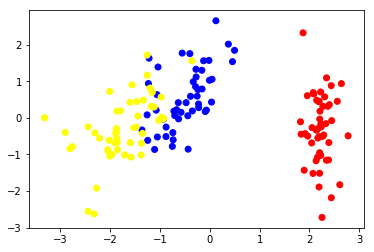

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
dfcolor = pd.DataFrame([['Iris-setosa','red'],['Iris-versicolor','blue'],['Iris-virginica','yellow']],columns=['class','Color'])
mergeddf = pd.merge(df,dfcolor,on='class')
plt.scatter(Y[:, 0], Y[:, 1], c=mergeddf['Color'])

plt.show()